In [58]:
# import libraries
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
from sklearn import datasets
import pandas as pd
import io
import random
from random import randint
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline


# generating training dataset


In [59]:
# upload file with dictionary format, with key as name of uploaded file 
# and corresponding values as the contens of the file 
from google.colab import files
uploaded_train = files.upload()
uploaded_test = files.upload()

# use panda and io pachage to load txt. 
df_train = pd.read_csv(io.StringIO(uploaded_train['Train_Data.txt'].decode("utf-8")), 
                       sep=',', names=['ID', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'class'], header=None)

#replace missing value ? with randint
x_train = torch.Tensor(df_train[['x1', 'x2', 'x4','x5', 'x6', 'x9']].replace({'?':randint(1, 10)}).values.astype(np.uint8))
# class 2 for benign, 4 for malignant -> 0 for bengn, 1 for malignant
y_train = torch.Tensor(df_train['class'].replace({2:0, 4:1}).values.astype(np.uint8))

Saving Train_Data.txt to Train_Data (9).txt


Saving Test_Data.txt to Test_Data (9).txt


#EDA(find correlation between features)

/usr/local/lib/python3.6/dist-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


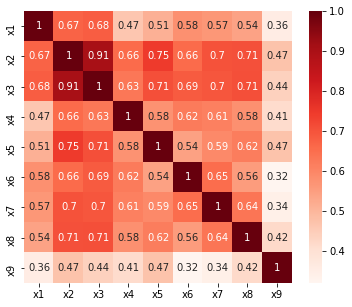

In [60]:
#using 1-filter method for feature selection

#Loading the dataset
df_train = np.where(df_train=='?',randint(1, 10),df_train)
'''
[[1000025 5 1 ... 1 1 2]
 [1002945 5 4 ... 2 1 2]
 [1015425 3 1 ... 1 1 2]
 ...
 [1182404 4 2 ... 1 1 2]
 [1204558 4 1 ... 1 1 2]
 [1217952 4 1 ... 1 1 2]]
 '''
X = pd.DataFrame(df_train[:,1:10],columns=['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9'])
#X.head()
X = X.astype(int)

#Using Pearson Correlation
plt.figure(figsize=(6,5))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


# Define model class
z = w1*x1 + w2*x2 + w3*x3 ....  + w6*x6 + b  -> <br>
y = a = sigma(z) -> <br>
L(y_hat = a, y)


In [61]:
class LogisticRegression(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x): 
    pred = torch.sigmoid(self.linear(x))
    return pred   #probability (not direct value)

  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0


# instantiate model class
torch.manual_seed(1)
model = LogisticRegression(x_train.shape[1], 1) # [500, 6]
print(list(model.parameters()))


[Parameter containing:
tensor([[ 0.2104, -0.1802, -0.0791,  0.1916, -0.3843,  0.2448]],
       requires_grad=True), Parameter containing:
tensor([-0.0840], requires_grad=True)]


# training the model 

In [62]:
# instantitate optimizer 
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.09,weight_decay=0.001)

# training the model 
epochs = 200
losses = []

for i in range(epochs):
  y_pred = model.forward(x_train)

  # calculrate loss 
  loss = criterion(y_pred, y_train)
  print("epoch: ", i, "loss: ", loss.item())
  losses.append(loss.item())

  optimizer.zero_grad() # clear gradients wrt parameters
  loss.backward()
  optimizer.step()

#Calcualte accuracy of train datasets
no_correct = 0

for i in range(len(x_train)):
  if model.predict(x_train[i]) == y_train[i]:
    no_correct += 1

accuracy = no_correct/len(x_train)*100
print("Train accuracy = {}%".format(accuracy))

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:529: UserWarning: Using a target size (torch.Size([500])) that is different to the input size (torch.Size([500, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


epoch:  0 loss:  1.2357287406921387
epoch:  1 loss:  0.9801179766654968
epoch:  2 loss:  1.0059466361999512
epoch:  3 loss:  0.9240667223930359
epoch:  4 loss:  0.7852089405059814
epoch:  5 loss:  0.670183002948761
epoch:  6 loss:  0.6353307366371155
epoch:  7 loss:  0.6214807629585266
epoch:  8 loss:  0.5535886287689209
epoch:  9 loss:  0.4790746569633484
epoch:  10 loss:  0.44556522369384766
epoch:  11 loss:  0.4361695349216461
epoch:  12 loss:  0.425645112991333
epoch:  13 loss:  0.4063946008682251
epoch:  14 loss:  0.3830696940422058
epoch:  15 loss:  0.36437952518463135
epoch:  16 loss:  0.3559867739677429
epoch:  17 loss:  0.3555266857147217
epoch:  18 loss:  0.35468634963035583
epoch:  19 loss:  0.3478609323501587
epoch:  20 loss:  0.3367367684841156
epoch:  21 loss:  0.3263518810272217
epoch:  22 loss:  0.3196243345737457
epoch:  23 loss:  0.3159526288509369
epoch:  24 loss:  0.3129824995994568
epoch:  25 loss:  0.30869418382644653
epoch:  26 loss:  0.30242863297462463
epoch:  

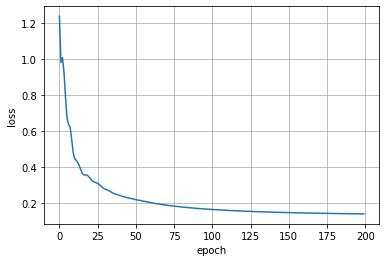

In [63]:
# log loss
plt.plot(range(epochs), losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.grid()


# model evalation with new datasets the model has never seen before

In [64]:
# use panda and io pachage to load txt. 
df_test = pd.read_csv(io.StringIO(uploaded_test['Test_Data.txt'].decode("utf-8")), 
                       sep=',', names=['ID', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'class'], header=None)
#replace missing value ? with randint
x_test = torch.Tensor(df_test[['x1', 'x2', 'x4','x5', 'x6', 'x9']].replace({'?':randint(1, 10)}).values.astype(np.uint8))
# class 2 for benign, 4 for malignant -> 0 for bengn, 1 for malignant
y_test = torch.Tensor(df_test['class'].replace({2:0, 4:1}).values.astype(np.uint8))

In [65]:
#model test w/ all test datasets
no_correct = 0

for i in range(len(x_test)):
  if model.predict(x_test[i]) == y_test[i]:
    no_correct += 1

accuracy = no_correct/len(x_test)*100
print("Predcition accuracy = {}%".format(accuracy))

Predcition accuracy = 99.49748743718592%
